In [170]:
# Initialize Otter
import otter
grader = otter.Notebook("ps8.ipynb")

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns

In [172]:
flights = pd.read_csv("flights.csv.gz")
airports = pd.read_csv("airports.csv")
print(flights.describe())
print(flights.head())

           year          month            day       dep_time  sched_dep_time  \
count  336776.0  336776.000000  336776.000000  328521.000000   336776.000000   
mean     2013.0       6.548510      15.710787    1349.109947     1344.254840   
std         0.0       3.414457       8.768607     488.281791      467.335756   
min      2013.0       1.000000       1.000000       1.000000      106.000000   
25%      2013.0       4.000000       8.000000     907.000000      906.000000   
50%      2013.0       7.000000      16.000000    1401.000000     1359.000000   
75%      2013.0      10.000000      23.000000    1744.000000     1729.000000   
max      2013.0      12.000000      31.000000    2400.000000     2359.000000   

           dep_delay       arr_time  sched_arr_time      arr_delay  \
count  328521.000000  328063.000000   336776.000000  327346.000000   
mean       12.639070    1502.054999     1536.380220       6.895377   
std        40.210061     533.264132      497.457142      44.633292   

## EDA

In this problemset, you will do some exploratory data analytics (EDA) by using some of the visualization libraries in Python

## Question 1

Line charts are ideal to show a trend line. Draw a line chart to show monthly frequency count of flights as a trend line for the year 2013. Be sure to choose the correct data to display on the x-axis and y-axis

1(a) (2 pts) 

In [173]:
flights.head()
#flights.groupby('month').sum(1)
flights[flights['month'] == 6]
# flights['']

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
222207,2013,6,1,2.0,2359,3.0,341.0,350,-9.0,B6,739,N618JB,JFK,PSE,200.0,1617,23,59,2013-06-02T03:00:00Z
222208,2013,6,1,451.0,500,-9.0,624.0,640,-16.0,US,1431,N538UW,EWR,CLT,75.0,529,5,0,2013-06-01T09:00:00Z
222209,2013,6,1,506.0,515,-9.0,715.0,800,-45.0,UA,1686,N35407,EWR,IAH,172.0,1400,5,15,2013-06-01T09:00:00Z
222210,2013,6,1,534.0,545,-11.0,800.0,829,-29.0,UA,1451,N27724,LGA,IAH,178.0,1416,5,45,2013-06-01T09:00:00Z
222211,2013,6,1,538.0,545,-7.0,925.0,922,3.0,B6,725,N806JB,JFK,BQN,203.0,1576,5,45,2013-06-01T09:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250445,2013,6,30,NaN,1945,NaN,NaN,2104,NaN,EV,5714,N836AS,JFK,IAD,NaN,228,19,45,2013-06-30T23:00:00Z
250446,2013,6,30,NaN,1610,NaN,NaN,1805,NaN,EV,4092,N16147,EWR,DAY,NaN,533,16,10,2013-06-30T20:00:00Z
250447,2013,6,30,NaN,1709,NaN,NaN,1856,NaN,EV,4662,N16911,EWR,RDU,NaN,416,17,9,2013-06-30T21:00:00Z
250448,2013,6,30,NaN,2059,NaN,NaN,2307,NaN,EV,5254,N760EV,LGA,DSM,NaN,1031,20,59,2013-07-01T00:00:00Z


<!-- BEGIN QUESTION -->



    month  flights
0       1    27004
1       2    24951
2       3    28834
3       4    28330
4       5    28796
5       6    28243
6       7    29425
7       8    29327
8       9    27574
9      10    28889
10     11    27268
11     12    28135


[Text(0.5, 0, 'Months (1-12)'), Text(0, 0.5, 'Monthly Frequency')]

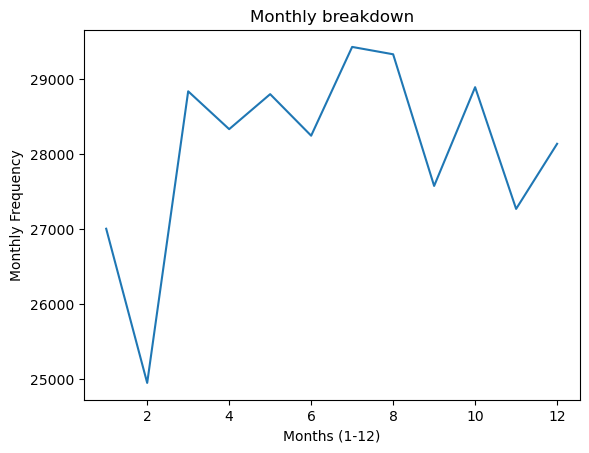

In [174]:
df = flights.groupby('month').size().reset_index(name='flights')
print(df)
fig1 = sns.lineplot(data=df, x='month', y='flights')
fig1.title.set_text('Monthly breakdown')
fig1.set(xlabel='Months (1-12)', ylabel='Monthly Frequency')


In [175]:
# dict(fig1.lines[0].get_xydata()[6])

In [176]:
grader.check("1a")

1a results: All test cases passed!

<!-- END QUESTION -->

### Show the top 5 airports that people flew into using a bar chart?
**1(b)** (2 pts)

In [177]:
# airports.describe()
top_airports = flights.groupby('dest').size().reset_index(name='flights').nlargest(5, 'flights')
top_airports

,dest,flights
69,ORD,17283
4,ATL,17215
49,LAX,16174
11,BOS,15508
54,MCO,14082


[Text(0.5, 0, 'Airport codes'), Text(0, 0.5, 'Total arrivals')]

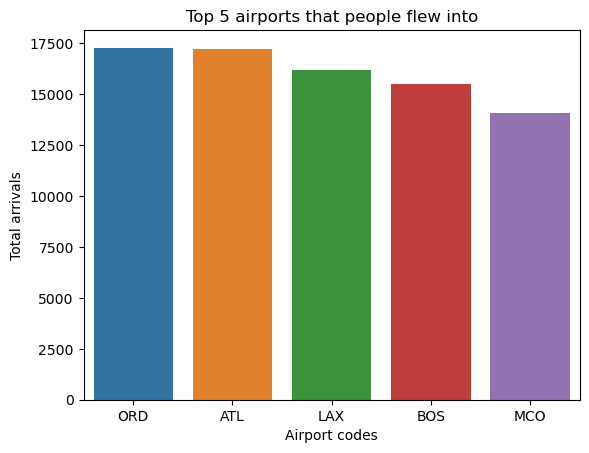

In [178]:
fig_2 = sns.barplot(data=top_airports, x='dest', y='flights')
fig_2.title.set_text('Top 5 airports that people flew into')
fig_2.set(xlabel='Airport codes', ylabel='Total arrivals')

In [179]:
grader.check("1b")

1b results: All test cases passed!

# Segmentation (a.k.a binning)
**1(c)** (3 pts)

Segment the flights based on time-slots with the following criteria
* flights that depart from 00-5:59am as 'red-eye' flights
* flights that depart from 6am - 11:59am as 'morning'
* flights that depart from 12noon - 3:59pm as 'afternoon'
* flights that depart from 4pm - 11:59pm as 'evening' 

And using seaborn create a plot as shown below

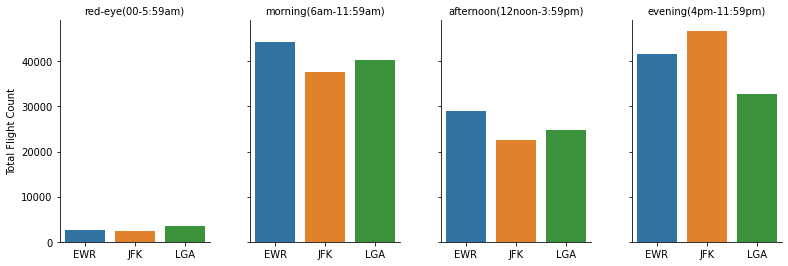

In [180]:
flights['time-slot'] = pd.cut(flights['dep_time'], bins=[0, 600, 1200, 1800, 2400], labels=['red-eye(00-5:59am)',
                                                                                            'morning(6am-11:59am)',
                                                                                            'afternoon(12noon-3:59pm)',
                                                                                            'evening(4pm-11:59pm)'])
flights_by_time = flights.groupby(['time-slot','origin']).size().reset_index(name='flights')
flights_by_time
# sns.barplot(data=flights_by_time, x='origin', y='flights', hue='time-slot')

,time-slot,origin,flights
0,red-eye(00-5:59am),EWR,2916
1,red-eye(00-5:59am),JFK,2584
2,red-eye(00-5:59am),LGA,3844
3,morning(6am-11:59am),EWR,44229
4,morning(6am-11:59am),JFK,37678
5,morning(6am-11:59am),LGA,40175
6,afternoon(12noon-3:59pm),EWR,44216
7,afternoon(12noon-3:59pm),JFK,39265
8,afternoon(12noon-3:59pm),LGA,37257
9,evening(4pm-11:59pm),EWR,26235


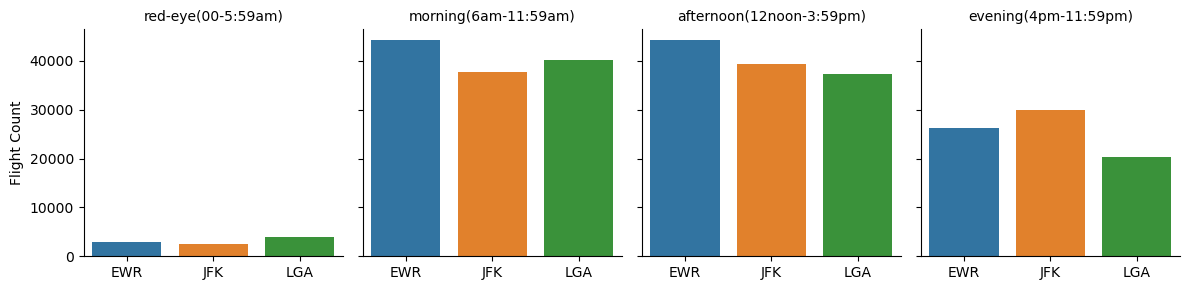

In [181]:
fig_3 = sns.FacetGrid(flights_by_time, col='time-slot', hue='origin')
fig_3.map(sns.barplot, 'origin', 'flights', order=['EWR', 'JFK', 'LGA'], hue_order=['EWR', 'JFK', 'LGA'])
fig_3.set_titles('{col_name}')
fig_3.set_axis_labels('', 'Flight Count')
fig_3.tight_layout()

In [182]:
grader.check("1c")

1c results: All test cases passed!

# Choropleth 
**2(a)** (3 pts)
Display the flight count information state-wise using plotly express
as shown below

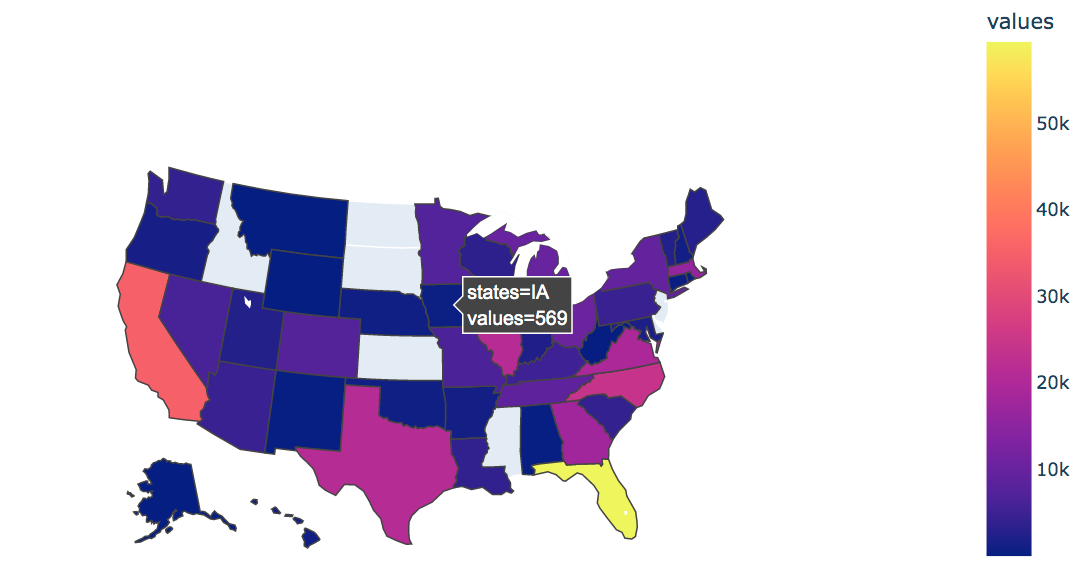

In [183]:
import plotly.express as px
flights_by_state = flights.merge(airports, left_on='dest', right_on='faa', how='left').groupby('state').size().reset_index(name='values')
fig_4 = px.choropleth(flights_by_state, locations='state', locationmode='USA-states', color='values', scope='usa')
fig_4.show()

<!-- BEGIN QUESTION -->

**2(b)** (3 pts)

Combining 1(a) and 1(b) above; find the monthly frequency distribution of the top 5 carriers to the top 5 destinations and show 1 trend line for each carrier in the same chart.

Hint: Use the top 5 destinations found earlier to subset the data. Then find the top 5 carriers to these top 5 destinations and find the monthly frequency for each carrier and plot 5 trendlines in the same chart.


<Axes: xlabel='month'>

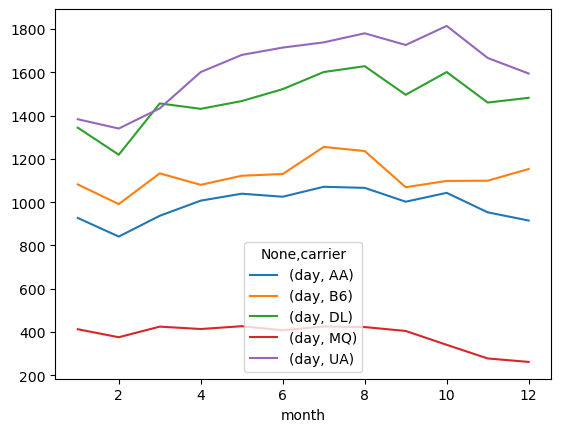

In [184]:
top_5 = flights.dest.value_counts().nlargest(5).index
top_carriers = flights[flights.dest.isin(top_5)].carrier.value_counts().nlargest(5).index

flights[(flights.dest.isin(top_5)) & (flights.carrier.isin(top_carriers))][['carrier','month','day']].groupby(['carrier', 'month']).count().unstack('carrier').plot(kind='line')


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**2(c)** (2 pts)

As an analyst, it's crucial to develop proficiency in posing good questions.
Pose two additional questions that could pique your curiosity, then plot charts to answer these questions and share your perspectives. Use any of the datasets provided with this assignment for this question.

### Q1: What average delays by time of day?

It looks like the least delayed flights are leaving from LGA in the morning between 6 am and 11:59am. The most delayed flights are leaving from EWR in the evening between 6 pm and 11:59 pm. This is a good insight but would benefit from more years of data.

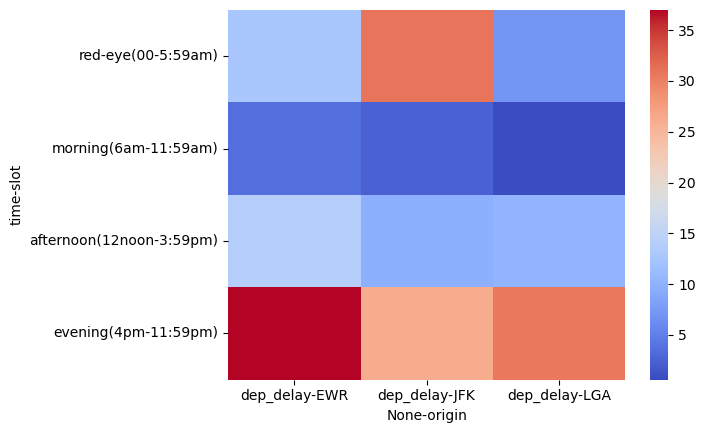

In [185]:
# Q1: What average delays by time of day?
flights['time-slot'] = pd.cut(flights['dep_time'], bins=[0, 600, 1200, 1800, 2400], labels=['red-eye(00-5:59am)',
                                                                                            'morning(6am-11:59am)',
                                                                                            'afternoon(12noon-3:59pm)',
                                                                                            'evening(4pm-11:59pm)'])
top_5_delays = flights.groupby(['origin', 'time-slot']).agg({'dep_delay':'mean'})
# top_5_delays
fig_5 = sns.heatmap(top_5_delays.unstack('origin'), cmap='coolwarm')

### Q2: Which carriers cancel the most flights by month?
It looks like all of the airports have a spike in cancellations in February. Notably, JFK does not suffer from as high of a cancellation rate  in December as the other two airports.

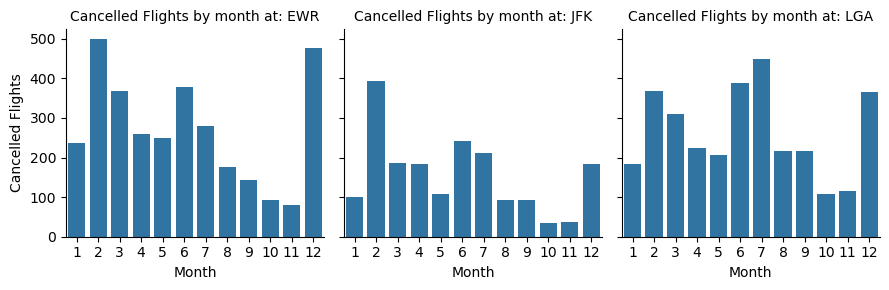

In [186]:
# Q2: Which months and airports have the most cancellations?
# cancelled flights have a missing dep_delay
cancelled_flights = flights[flights.dep_delay.isna()].groupby(['origin', 'month']).size().reset_index(name='cancelled_flights')
cancelled_flights
# cancelled_flights
fig_6 = sns.FacetGrid(cancelled_flights, col='origin')
fig_6.map(sns.barplot, 'month', 'cancelled_flights', order=range(1,13))
fig_6.set_titles('Cancelled Flights by month at: {col_name}')
fig_6.set_axis_labels('Month', 'Cancelled Flights')

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Upload this .zip file to Gradescope for grading.

In [187]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807
This version of python seems to be incorrectly compiled
(internal generated filenames are not absolute).
This may make the debugger miss breakpoints.
Related bug: http://bugs.python.org/issue1666807



RuntimeError: b'This version of python seems to be incorrectly compiled\n(internal generated filenames are not absolute).\nThis may make the debugger miss breakpoints.\nRelated bug: http://bugs.python.org/issue1666807\nThis version of python seems to be incorrectly compiled\n(internal generated filenames are not absolute).\nThis may make the debugger miss breakpoints.\nRelated bug: http://bugs.python.org/issue1666807\n'